In [86]:
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.cross_validation import cross_val_predict
from sklearn.neighbors import KNeighborsRegressor

In [87]:
def one_hot(df, cols):
    """
    @param df pandas DataFrame
    @param cols a list of columns to encode 
    @return a DataFrame with one-hot encoding
    """
    for each in cols:
        dummies = pd.get_dummies(df[each], prefix=each, drop_first=False)
        df = pd.concat([df, dummies], axis=1)
    return df

In [88]:
dataset = pd.read_csv('network_backup_dataset.csv')
dataset.columns = ['week', 'day_of_week', 'backup_start_time', 'work_flow_id', 'file_name', 'size_of_backup', 'backup_time']
dataset_revised = one_hot(dataset, ['day_of_week', 'backup_start_time', 'work_flow_id', 'file_name'])
dataset_revised.drop('day_of_week', 1, inplace=True)
dataset_revised.drop('backup_start_time', 1, inplace=True)
dataset_revised.drop('work_flow_id',1,inplace=True)
dataset_revised.drop('file_name',1,inplace=True)
dataset_revised.drop('week',1,inplace=True)

In [89]:
X_data = dataset_revised
y_data = dataset_revised.pop('size_of_backup')

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.1, random_state=0)

In [91]:
for i in range(1,6):
    for j in range(20,51):
        knr=KNeighborsRegressor(n_neighbors=i,leaf_size=j,p=1,metric='minkowski',weights='distance')
        knr.fit(X_train,y_train)
        accuracy=cross_val_score(knr,X_train,y_train,cv=10)
        print("Accuarcy using K-nearest neighbor regression using ", i, "neighbors with ", j , "leaves is ",np.mean(accuracy))

('Accuarcy using K-nearest neighbor regression using ', 1, 'neighbors with ', 20, 'leaves is ', 0.9831360636551599)
('Accuarcy using K-nearest neighbor regression using ', 1, 'neighbors with ', 21, 'leaves is ', 0.9831360636551599)
('Accuarcy using K-nearest neighbor regression using ', 1, 'neighbors with ', 22, 'leaves is ', 0.9831360636551599)
('Accuarcy using K-nearest neighbor regression using ', 1, 'neighbors with ', 23, 'leaves is ', 0.9831360636551599)
('Accuarcy using K-nearest neighbor regression using ', 1, 'neighbors with ', 24, 'leaves is ', 0.9831360636551599)
('Accuarcy using K-nearest neighbor regression using ', 1, 'neighbors with ', 25, 'leaves is ', 0.9831360636551599)
('Accuarcy using K-nearest neighbor regression using ', 1, 'neighbors with ', 26, 'leaves is ', 0.9831360636551599)
('Accuarcy using K-nearest neighbor regression using ', 1, 'neighbors with ', 27, 'leaves is ', 0.9831360636551599)
('Accuarcy using K-nearest neighbor regression using ', 1, 'neighbors wi

('Accuarcy using K-nearest neighbor regression using ', 3, 'neighbors with ', 29, 'leaves is ', 0.9884727941003341)
('Accuarcy using K-nearest neighbor regression using ', 3, 'neighbors with ', 30, 'leaves is ', 0.9884554251892279)
('Accuarcy using K-nearest neighbor regression using ', 3, 'neighbors with ', 31, 'leaves is ', 0.9884554251892279)
('Accuarcy using K-nearest neighbor regression using ', 3, 'neighbors with ', 32, 'leaves is ', 0.9884554251892279)
('Accuarcy using K-nearest neighbor regression using ', 3, 'neighbors with ', 33, 'leaves is ', 0.9884554251892279)
('Accuarcy using K-nearest neighbor regression using ', 3, 'neighbors with ', 34, 'leaves is ', 0.9884554251892279)
('Accuarcy using K-nearest neighbor regression using ', 3, 'neighbors with ', 35, 'leaves is ', 0.9884554251892279)
('Accuarcy using K-nearest neighbor regression using ', 3, 'neighbors with ', 36, 'leaves is ', 0.9884554251892279)
('Accuarcy using K-nearest neighbor regression using ', 3, 'neighbors wi

('Accuarcy using K-nearest neighbor regression using ', 5, 'neighbors with ', 38, 'leaves is ', 0.989221088037018)
('Accuarcy using K-nearest neighbor regression using ', 5, 'neighbors with ', 39, 'leaves is ', 0.989221088037018)
('Accuarcy using K-nearest neighbor regression using ', 5, 'neighbors with ', 40, 'leaves is ', 0.989221088037018)
('Accuarcy using K-nearest neighbor regression using ', 5, 'neighbors with ', 41, 'leaves is ', 0.989221088037018)
('Accuarcy using K-nearest neighbor regression using ', 5, 'neighbors with ', 42, 'leaves is ', 0.989221088037018)
('Accuarcy using K-nearest neighbor regression using ', 5, 'neighbors with ', 43, 'leaves is ', 0.989221088037018)
('Accuarcy using K-nearest neighbor regression using ', 5, 'neighbors with ', 44, 'leaves is ', 0.989221088037018)
('Accuarcy using K-nearest neighbor regression using ', 5, 'neighbors with ', 45, 'leaves is ', 0.989221088037018)
('Accuarcy using K-nearest neighbor regression using ', 5, 'neighbors with ', 46

In [92]:
def calculate_RMSE(predicted, actual):  
    return np.sqrt(np.mean((predicted - actual) ** 2))  

Test RMSE for this model is : 0.017161532652346243
Train RMSE for this model is: 0.010648429314147704
RMSE for this model is : 0.010414950644312217


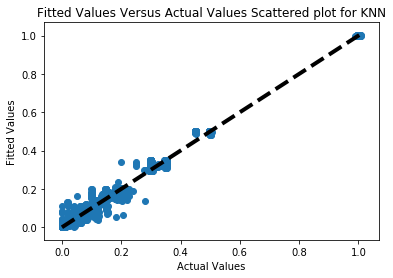

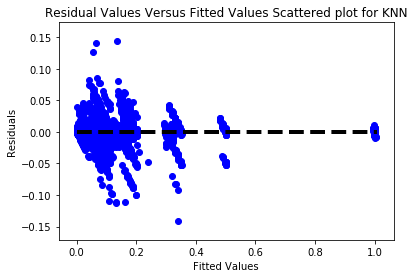

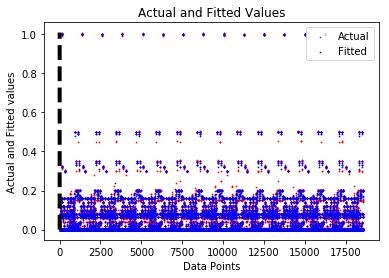

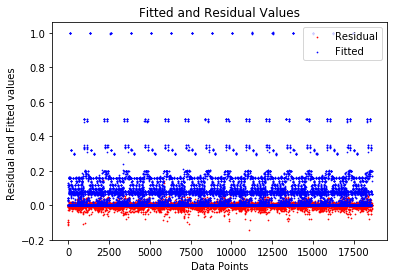

In [93]:
knr=KNeighborsRegressor(n_neighbors=5,leaf_size=30,p=1,metric='minkowski',weights='distance')
knr.fit(X_train,y_train)
predicted_test_value = cross_val_predict(knr, X_test, y_test, cv=10)
predicted_train_value = cross_val_predict(knr, X_train, y_train, cv=10)

print ("Test RMSE for this model is : " + str(calculate_RMSE(predicted_test_value, y_test)))
print("Train RMSE for this model is: " + str(calculate_RMSE(predicted_train_value, y_train)))
    
knr = KNeighborsRegressor(n_neighbors=5,leaf_size=30,p=1,metric='minkowski',weights='distance')
knr.fit(X_data,y_data)
predicted_data_value = cross_val_predict(knr, X_data, y_data, cv=10)
print ("RMSE for this model is : " + str(calculate_RMSE(predicted_data_value, y_data)))

plt.title('Fitted Values Versus Actual Values Scattered plot for KNN')
plt.scatter(y_data, predicted_data_value)
plt.plot([y_data.min(), y_data.max()], [y_data.min(), y_data.max()], 'k--', lw=4)
plt.xlabel('Actual Values')
plt.ylabel('Fitted Values')
plt.show()

plt.title('Residual Values Versus Fitted Values Scattered plot for KNN')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.scatter(predicted_data_value,y_data-predicted_data_value,  color='blue', lw=1, label='residual')
plt.plot([y_data.min(), y_data.max()], [0, 0], 'k--', lw=4)
plt.show()    

row=dataset_revised.shape[0]
datapoints = range(row)

fig, ax = plt.subplots()
a=ax.scatter(datapoints, y_data,color='r',marker='o',s=0.50)
b=ax.scatter(datapoints, predicted_data_value,color='b',marker='o',s=0.50)
ax.plot([0, y.max()], [y.min(), y.max()],  'k--', lw=4)
ax.set_xlabel('Data Points')
ax.set_ylabel('Actual and Fitted values')
plt.title('Actual and Fitted Values')
ax.legend((a,b),('Actual','Fitted'))
plt.savefig('Actual and Fitted values')
plt.show()


fig, ax = plt.subplots()
a=ax.scatter(datapoints, y_data-predicted_data_value,color='r',marker='o',s=0.50)
b=ax.scatter(datapoints, predicted_data_value,color='b',marker='o',s=0.50)
ax.set_xlabel('Data Points')
ax.set_ylabel('Residual and Fitted values ')
plt.title('Fitted and Residual Values')
ax.legend((a,b),('Residual','Fitted'))
plt.savefig('Fitted and Residual Values')
plt.show()